In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
for gpu in tf.config.experimental.list_physical_devices('GPU'):
	tf.compat.v2.config.experimental.set_memory_growth(gpu, True)

In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-04),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_dir = "data/kaggle_pets/train/"
validation_dir = "data/kaggle_pets/val/"
test_dir = "data/kaggle_pets/test/"

In [9]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    class_mode="binary",
                                                    batch_size=50)

Found 17500 images belonging to 2 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        class_mode="binary",
                                                        batch_size=50)

Found 2500 images belonging to 2 classes.


In [11]:
for data_batch, label_batch in train_generator:
    d = data_batch
    l = label_batch
    break

In [12]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              validation_data=validation_generator,
                              workers=16,
                              max_queue_size=128)

Epoch 1/30


W0722 22:08:39.934903 139752146253632 deprecation.py:323] From /home/rtx/tensorflow_nightly/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


350/350 [==============================] - 35s 99ms/step - loss: 0.6327 - accuracy: 0.6294 - val_loss: 0.6629 - val_accuracy: 0.6068
Epoch 2/30
350/350 [==============================] - 23s 67ms/step - loss: 0.5363 - accuracy: 0.7278 - val_loss: 0.5116 - val_accuracy: 0.7324
Epoch 3/30
350/350 [==============================] - 23s 66ms/step - loss: 0.4889 - accuracy: 0.7645 - val_loss: 0.4483 - val_accuracy: 0.7888
Epoch 4/30
350/350 [==============================] - 25s 71ms/step - loss: 0.4483 - accuracy: 0.7907 - val_loss: 0.4796 - val_accuracy: 0.7636
Epoch 5/30
350/350 [==============================] - 25s 71ms/step - loss: 0.4178 - accuracy: 0.8082 - val_loss: 0.3974 - val_accuracy: 0.8188
Epoch 6/30
350/350 [==============================] - 25s 71ms/step - loss: 0.3935 - accuracy: 0.8214 - val_loss: 0.3914 - val_accuracy: 0.8208
Epoch 7/30
350/350 [==============================] - 25s 71ms/step - loss: 0.3674 - accuracy: 0.8369 - val_loss: 0.3947 - val_accuracy: 0.8268
Epo

In [13]:
model.save("cats_and_dogs_1.h5")

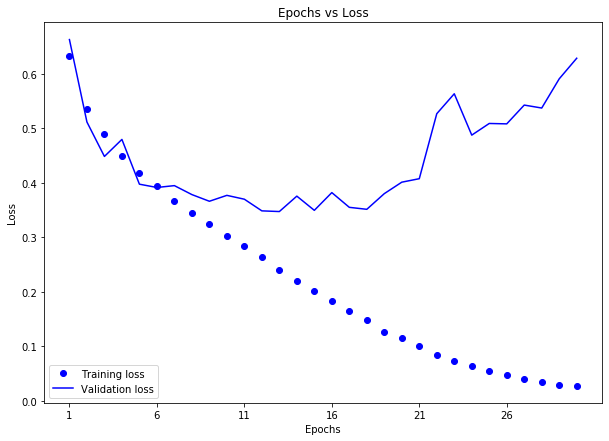

In [19]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(history.history["accuracy"])+1)

plt.figure(figsize=(10,7))
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(min(epochs),max(epochs)+1,5))
plt.plot(epochs,loss,"bo",label="Training loss")
plt.plot(epochs,val_loss,"b",label="Validation loss")
plt.legend()

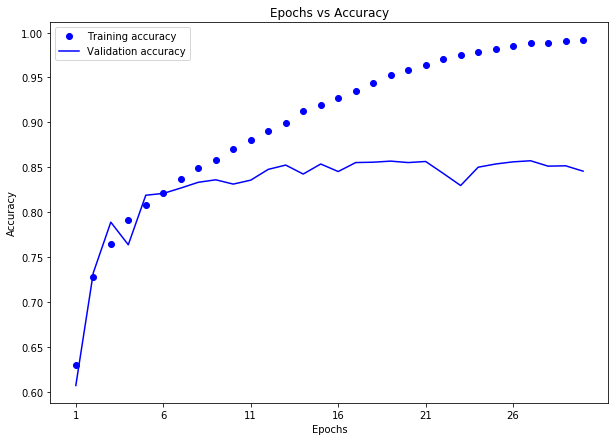

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(history.history["accuracy"])+1)

plt.figure(figsize=(10,7))
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(np.arange(min(epochs),max(epochs)+1,5))
plt.plot(epochs,acc,"bo",label="Training accuracy")
plt.plot(epochs,val_acc,"b",label="Validation accuracy")
plt.legend()